In [70]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyoff

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
data = "city_temperature.csv"
df = pd.read_csv(data)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [9]:
#Delete columns with only NaN and drop all other NaNs
del df['State']
df.dropna(inplace=True)
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [12]:
#Get the number of Countries and Regions
print(len(df["Country"].unique()))
print(len(df["Region"].unique()))

125
7


In [23]:
def month_hot_avg(month):
    africa_data = df[(df["Region"]=="Africa") & (df["Month"]==month) & (df["Year"]>1994)]
    africa_avg_month_deg = africa_data.groupby("Year")["AvgTemperature"].mean()
    return africa_avg_month_deg
def plot(x,y,z,months,season):
    fig,axs = plt.subplots(3,figsize=(15,10))
    fig.suptitle('African '+ season +' Months Temperature Averages by Years',color='g',fontsize=15)
    
    axs[0].plot(x.axes[0], x, 'o-', color = '#FF7F00')
    axs[0].grid(color='r', linestyle='dotted', linewidth=1)
    axs[0].set_title(str(months[0])+'. Months')
    axs[0].set_xlabel("Year")
    axs[0].set_ylabel("Average Temperature")
    
    axs[1].plot(y.axes[0], y, 'o-', color = '#9900CC')
    axs[1].grid(color='r', linestyle='dotted', linewidth=1)
    axs[1].set_title(str(months[1])+'. Months')
    axs[1].set_xlabel("Year")
    axs[1].set_ylabel("Average Temperature")
    
    axs[2].plot(z.axes[0], z, 'o-', color = '#66FF00')
    axs[2].grid(color='r', linestyle='dotted', linewidth=1)
    axs[2].set_title(str(months[2])+'. Months')
    axs[2].set_xlabel("Year")
    axs[2].set_ylabel("Average Temperature")
    for ax in axs.flat:
        ax.label_outer()
    

## Average Temperature in Africa at different seasons

Note: The seasons used in this analysis are based on South Africa season, may differ for different countries
1 to 12 correspond to January to December, in that order.

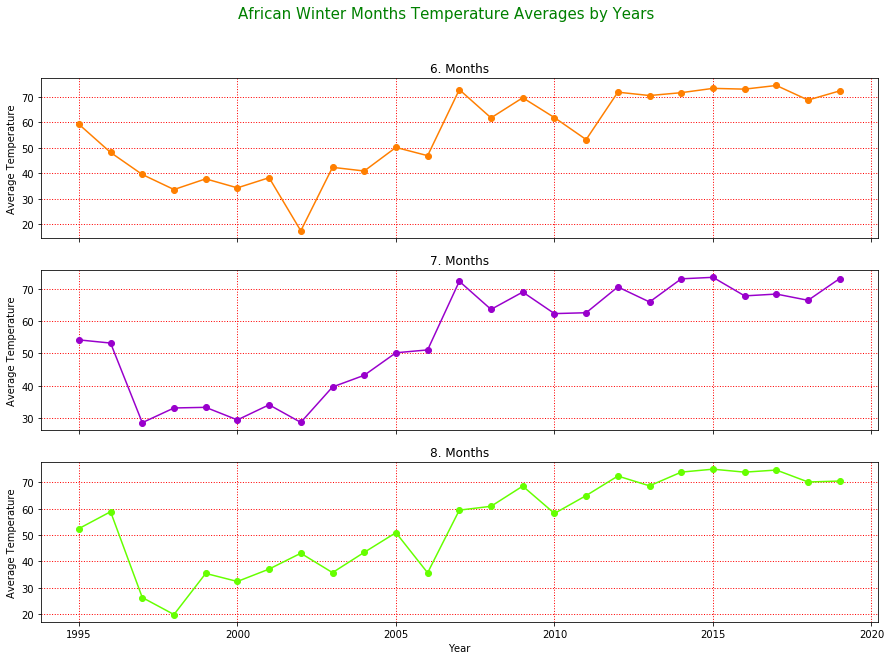

In [25]:
#Winter months avarege temp
season = "Winter"
months =[6,7,8]
_1st_month = month_hot_avg(months[0])
_2nd_month = month_hot_avg(months[1])
_3rd_month = month_hot_avg(months[2])
plot(_1st_month,_2nd_month,_3rd_month,months,season)

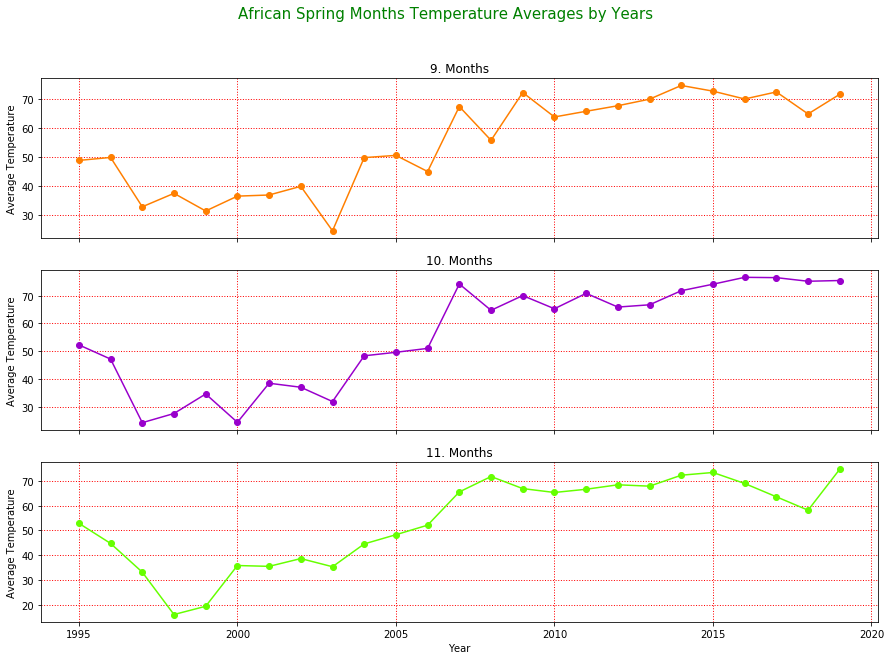

In [26]:
#Spring months avarege temp
season = "Spring"
months =[9,10,11]
_1st_month = month_hot_avg(months[0])
_2nd_month = month_hot_avg(months[1])
_3rd_month = month_hot_avg(months[2])
plot(_1st_month,_2nd_month,_3rd_month,months,season)

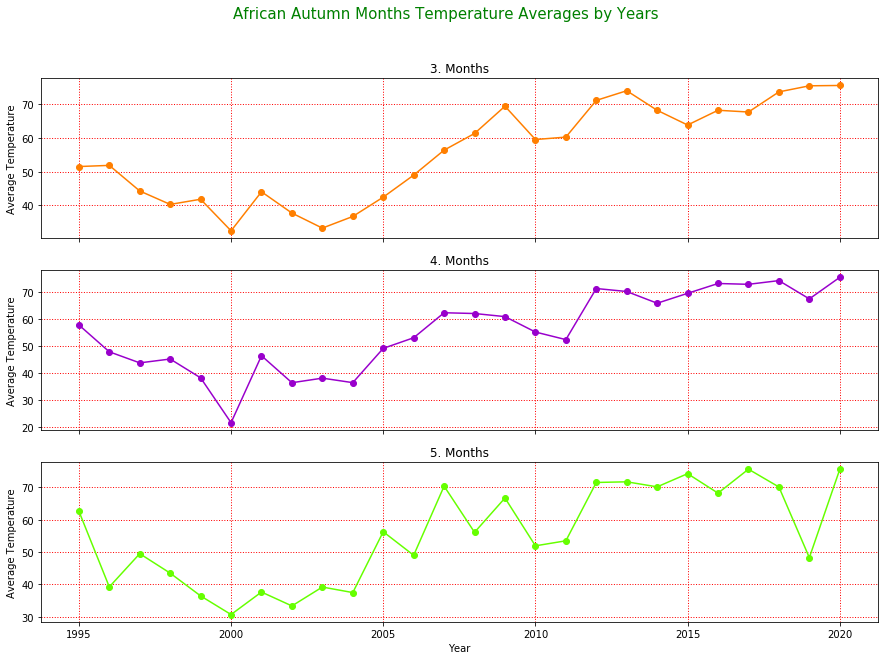

In [27]:
#Autumn months avarege temp
season = "Autumn"
months =[3,4,5]
_1st_month = month_hot_avg(months[0])
_2nd_month = month_hot_avg(months[1])
_3rd_month = month_hot_avg(months[2])
plot(_1st_month,_2nd_month,_3rd_month,months,season)

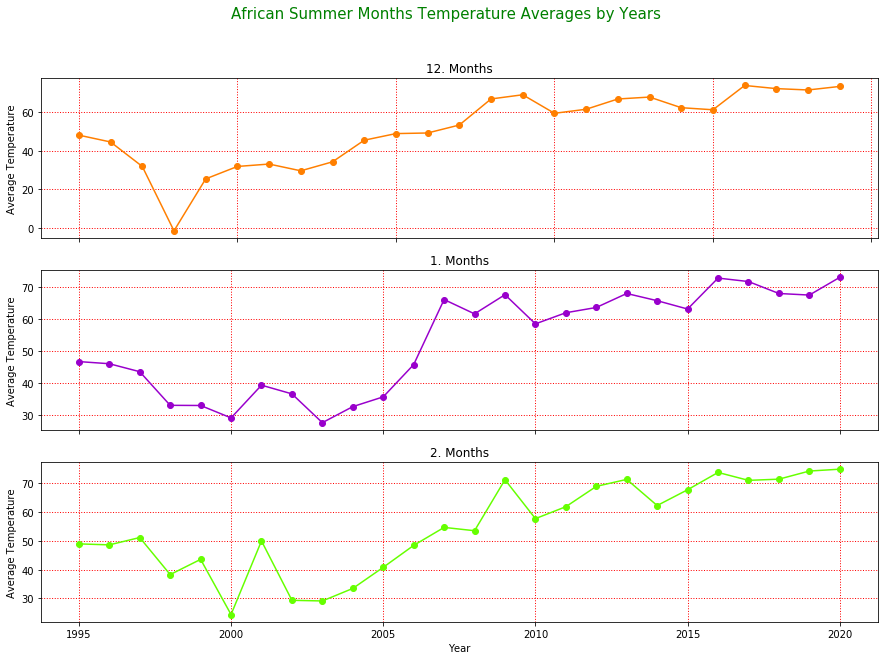

In [28]:
#Summer months avarege temp
season = "Summer"
months =[12,1,2]
_1st_month = month_hot_avg(months[0])
_2nd_month = month_hot_avg(months[1])
_3rd_month = month_hot_avg(months[2])
plot(_1st_month,_2nd_month,_3rd_month,months,season)

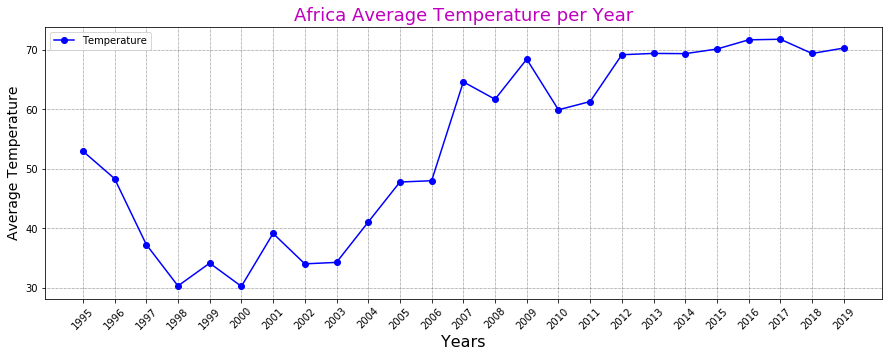

In [36]:
africa_data = df[(df["Region"]=="Africa") & (df["Year"]>1994) & (df["Year"]<2020)]
africa_avg_year_deg = africa_data.groupby("Year")["AvgTemperature"].mean()
africa_avg_year_deg 
x=africa_avg_year_deg.axes[0]
y=africa_avg_year_deg
plt.figure(figsize=(15,5))
plt.plot(x,y,"o-",linestyle='solid',label="Temperature", color='b')
plt.xticks(x, x, rotation=45)
plt.ylabel("Average Temperature",fontsize=14)
plt.xlabel("Years",fontsize=16)
plt.legend()
plt.title("Africa Average Temperature per Year",fontdict={'fontsize': 18, 'fontweight': 'medium'},color='m')
plt.grid(color='k', linestyle='dotted', linewidth=0.5)
plt.show()

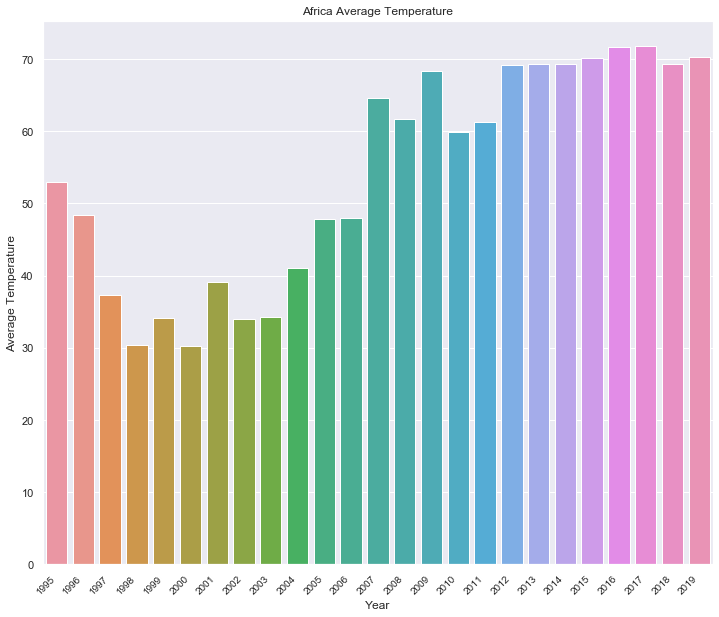

In [63]:
Africa_avg_deg = africa_data.groupby("Year")["AvgTemperature"].mean()
Africa_avg_deg


sns.set(rc={'figure.figsize':(12,10)})

ax = sns.barplot(y=Africa_avg_deg, x = Africa_avg_deg.axes[0], ci=False).set(title='Africa Average Temperature', xlabel = 'Year', ylabel = 'Average Temperature')

plt.xticks(rotation=45, ha='right', fontweight='light', fontsize='small');

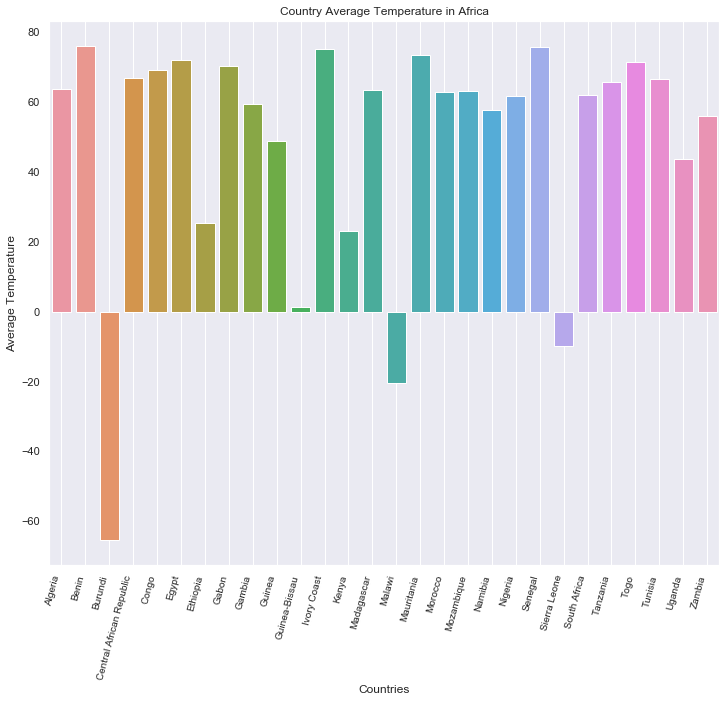

In [68]:
Country_avg_deg = africa_data.groupby("Country")["AvgTemperature"].mean()
Country_avg_deg


sns.set(rc={'figure.figsize':(12,10)})

ax = sns.barplot(y=Country_avg_deg, x = Country_avg_deg.axes[0], ci=False).set(title='Country Average Temperature in Africa', xlabel = 'Countries', ylabel = 'Average Temperature')

plt.xticks(rotation=75, ha='right', fontweight='light', fontsize='small');
plt.grid()

## Regression

In [69]:
x = Africa_avg_deg.axes[0].values.reshape(-1,1)
y = Africa_avg_deg.values.reshape(-1,1)
print(x.shape)
print(y.shape)

(25, 1)
(25, 1)


In [109]:
Poly_reg=PolynomialFeatures(degree=2) 
x_poly=Poly_reg.fit_transform(x)
Lin_reg = LinearRegression()
Lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Linear and Polynomial Regression of the Average Temperature in Africa by Years

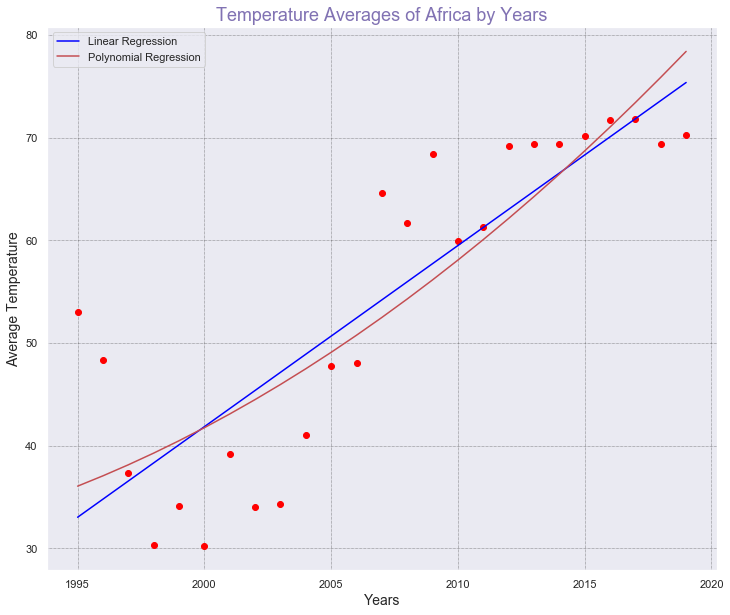

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(x, y, color='red')
    plt.plot(x, lin_reg.predict(x), color='blue')
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("Average Temperature",fontsize=14)
    plt.title("Temperature Averages of Africa by Years",fontdict={'fontsize': 18, 'fontweight': 'medium'},color='m')
    plt.grid(color='k', linestyle='dotted', linewidth=0.5)
    y_pred=Lin_reg.predict(x_poly)
    plt.plot(x,y_pred,color="r",label="Polinomial Regression Model")
    plt.legend(["Linear Regression", "Polynomial Regression"])
    plt.show()
    return
viz_linear()

### Polynomial Regression of the Average Temperature in Africa by Years

- Better fit

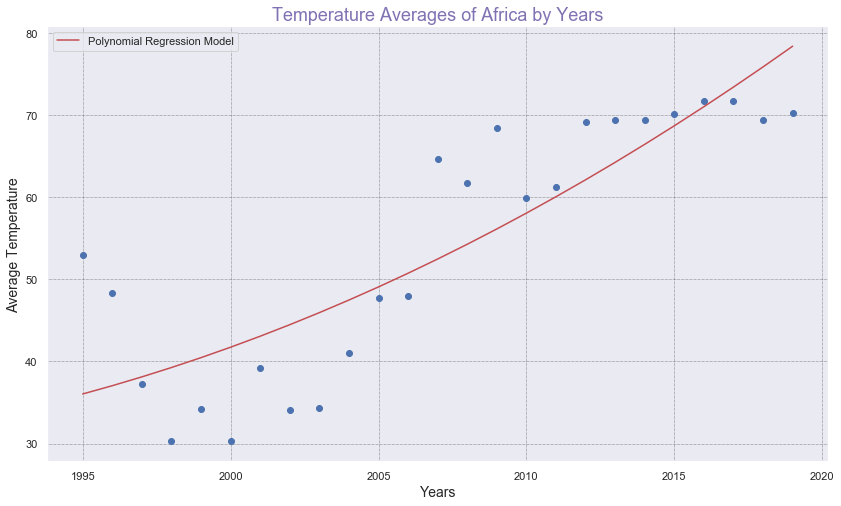

In [112]:
plt.figure(figsize=(14, 8))
plt.scatter(x,y)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Average Temperature",fontsize=14)
plt.title("Temperature Averages of Africa by Years",fontdict={'fontsize': 18, 'fontweight': 'medium'},color='m')
plt.grid(color='k', linestyle='dotted', linewidth=0.5)
y_pred=Lin_reg.predict(x_poly)
plt.plot(x,y_pred,color="r",label="Polynomial Regression Model")
plt.legend()
plt.show()